<a href="https://colab.research.google.com/github/Pra1221/RainPredictionFinalProject/blob/main/newProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load Dataset
data = pd.read_csv("Rainfall.csv")

# Step 3: Basic Summary
print("✅ Dataset loaded successfully!\n")
print("📊 Initial Shape:", data.shape)
print("\n🧾 Columns:", list(data.columns))
print("\n🔍 First 5 rows:")
print(data.head())

# Optional: Check column-wise missing values
print("\n❓ Missing values per column:\n", data.isnull().sum())


✅ Dataset loaded successfully!

📊 Initial Shape: (366, 12)

🧾 Columns: ['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection', 'windspeed']

🔍 First 5 rows:
   day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   cloud   \
0    1     1025.9     19.9         18.3     16.8      13.1         72      49   
1    2     1022.0     21.7         18.9     17.2      15.6         81      83   
2    3     1019.7     20.3         19.3     18.0      18.4         95      91   
3    4     1018.9     22.3         20.6     19.1      18.8         90      88   
4    5     1015.9     21.3         20.7     20.2      19.9         95      81   

  rainfall  sunshine           winddirection  windspeed  
0      yes       9.3                    80.0       26.3  
1      yes       0.6                    50.0       15.3  
2      yes       0.0                    40.0       14.2  
3      yes       1.0                 

In [2]:
# Step 1: Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Step 2: Drop unnecessary columns (like 'day')
data = data.drop(columns=['day'])

# Step 3: Handle missing values
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

# Step 4: Convert 'rainfall' from 'yes'/'no' to 1/0
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})

# Step 5: Confirm everything looks good
print("✅ Data Cleaning Completed")
print("📊 New Shape:", data.shape)
print("\n🧾 Columns:", list(data.columns))
print("\n🧪 Unique Rainfall Values:", data['rainfall'].unique())
print("\n🧼 Any missing values left?\n", data.isnull().sum())


✅ Data Cleaning Completed
📊 New Shape: (366, 11)

🧾 Columns: ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']

🧪 Unique Rainfall Values: [1 0]

🧼 Any missing values left?
 pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


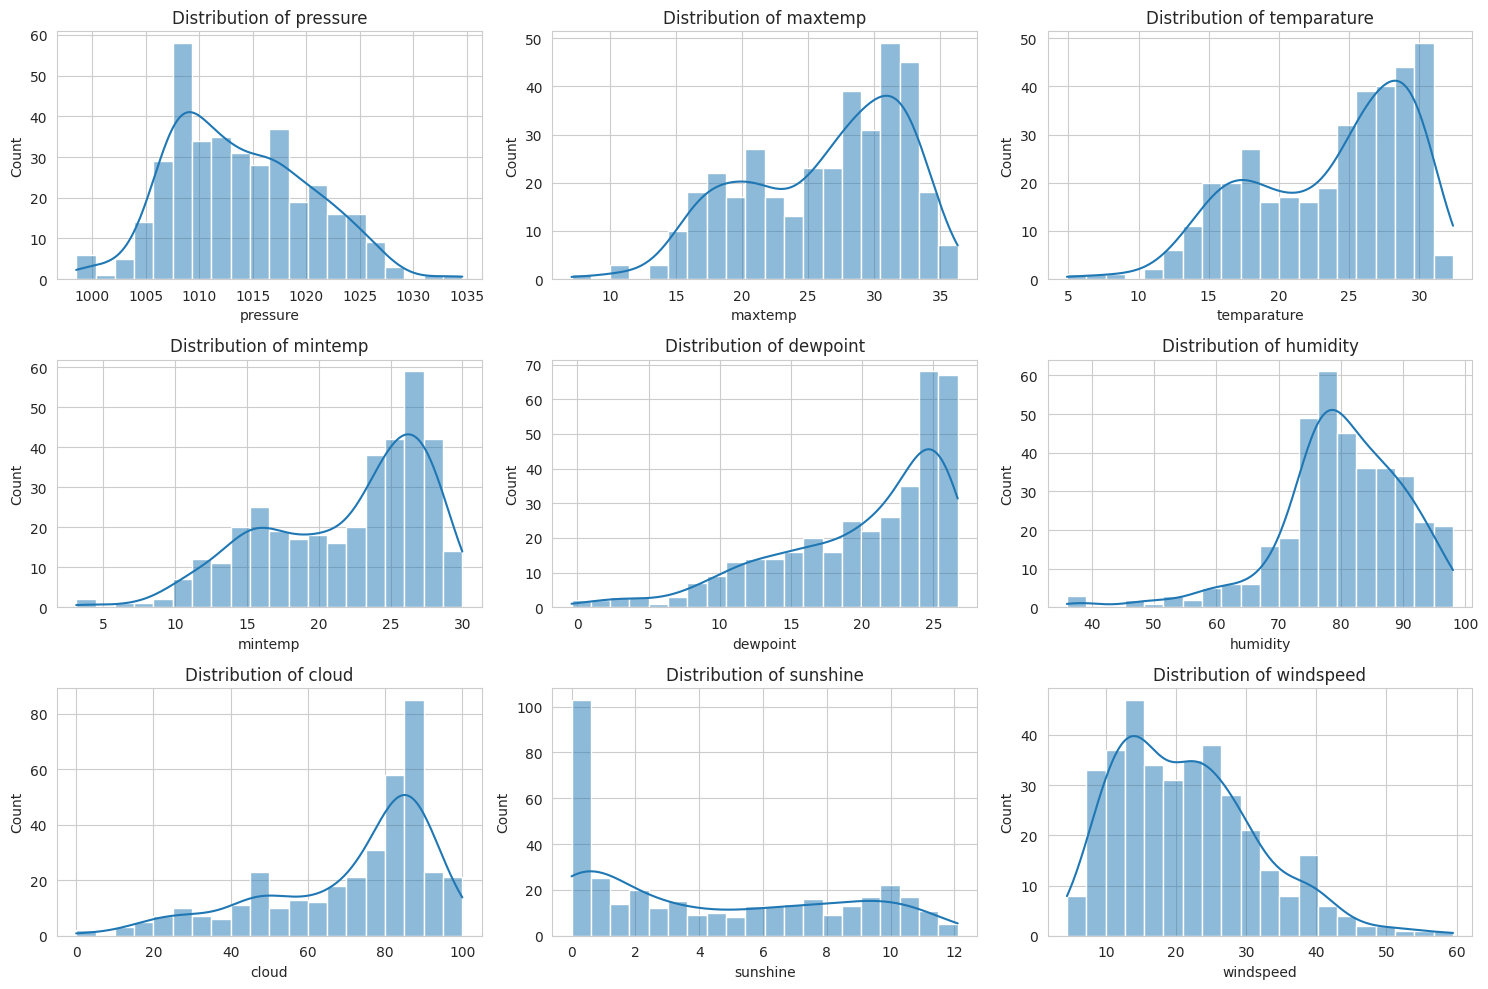

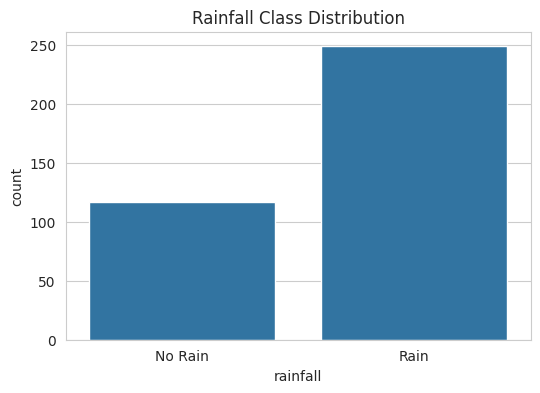

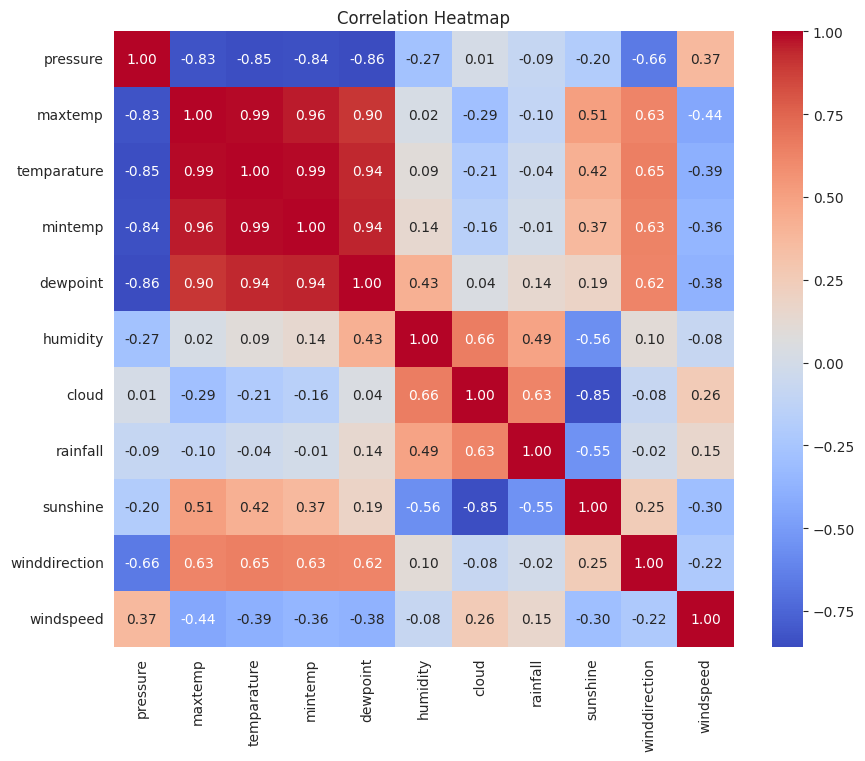

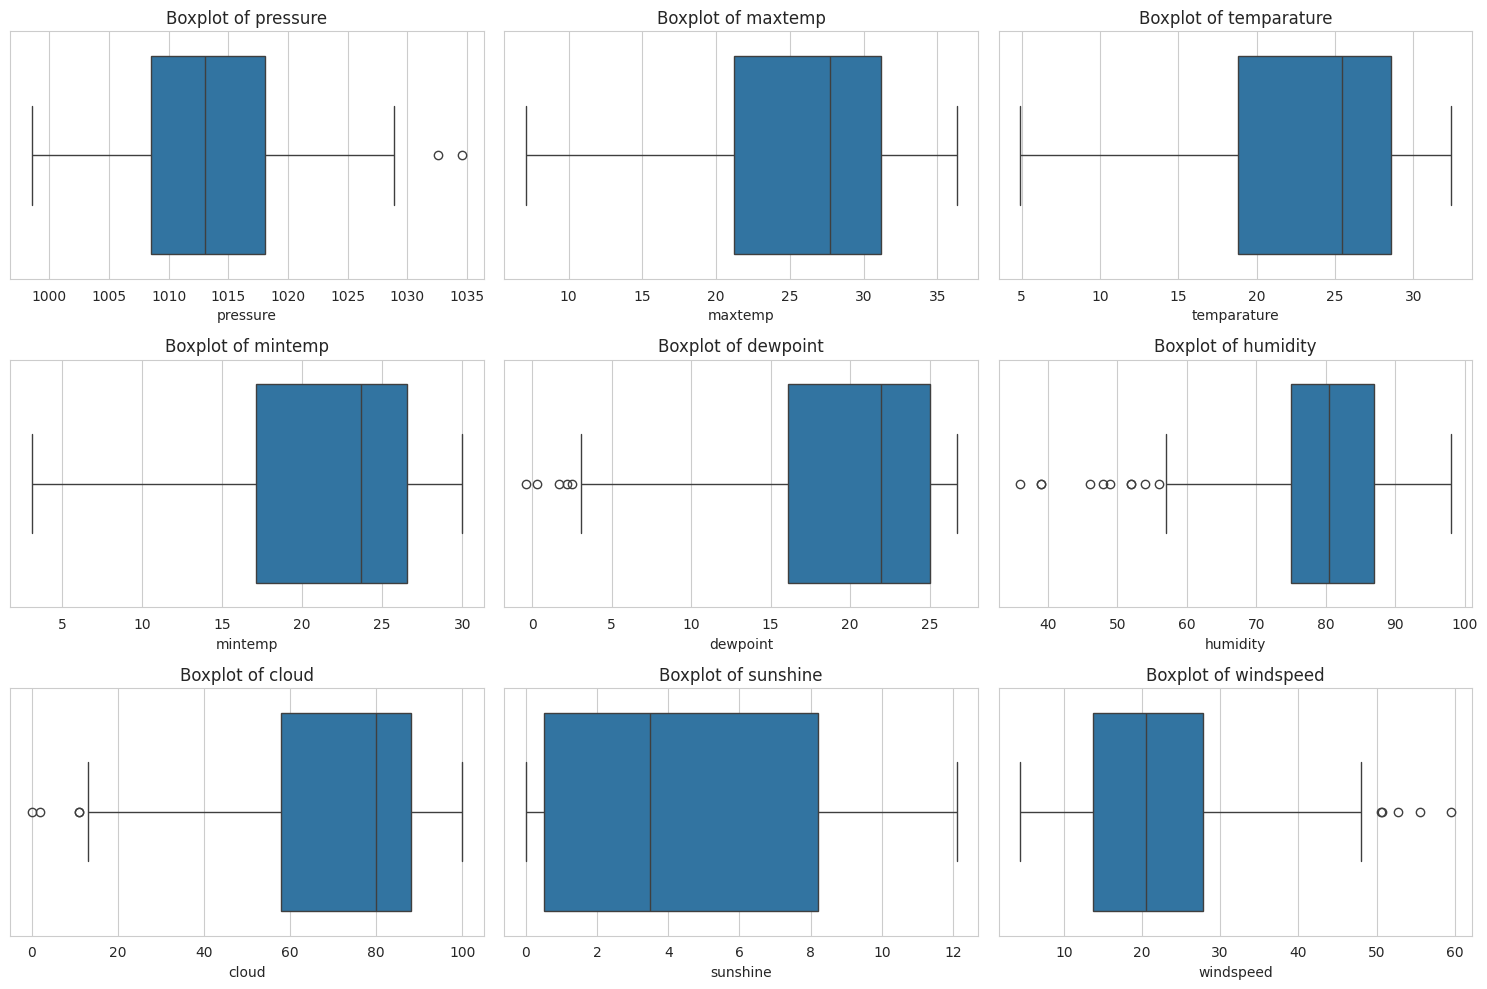

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# 1. Distribution of Numerical Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# 2. Rainfall Class Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='rainfall', data=data)
plt.title("Rainfall Class Distribution")
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Boxplots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Select the correlated temperature features
temp_features = data[['maxtemp', 'temparature', 'mintemp']]

# Step 2: Standardize the features (important for PCA)
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(temp_features)

# Step 3: Apply PCA to combine them into one principal component
pca = PCA(n_components=1)
temp_pca = pca.fit_transform(temp_scaled)

# Step 4: Add new feature to original dataset
data['temp_combined'] = temp_pca

# Step 5: Drop the original temperature columns
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

# Step 6: Confirm result
print("✅ PCA applied successfully!")
print("📊 New dataset shape:", data.shape)
print("🧾 Columns now:", data.columns.tolist())


✅ PCA applied successfully!
📊 New dataset shape: (366, 9)
🧾 Columns now: ['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed', 'temp_combined']


In [22]:
print("📊 Dataset after PCA:")
print(data.head())        # first 5 rows
print("\n🔢 Columns:", list(data.columns))


📊 Dataset after PCA:
   pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  \
0    1025.9      13.1        72     49         1       9.3           80.0   
1    1022.0      15.6        81     83         1       0.6           50.0   
2    1019.7      18.4        95     91         1       0.0           40.0   
3    1018.9      18.8        90     88         1       1.0           50.0   
4    1015.9      19.9        95     81         1       0.0           40.0   

   windspeed  temp_combined  
0       26.3      -1.693882  
1       15.3      -1.417261  
2       14.2      -1.428361  
3       16.9      -0.988018  
4       13.7      -0.960622  

🔢 Columns: ['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed', 'temp_combined']


In [6]:
# Step 1: Separate majority and minority
df_majority = data[data['rainfall'] == 1]  # rainfall = 1 (249 rows)
df_minority = data[data['rainfall'] == 0]  # rainfall = 0 (117 rows)

# Step 2: Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,                 # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)

# Step 3: Combine both
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Step 4: Shuffle the combined data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Check result
print("\n✅ After balancing (upsampling):")
print("📊 Shape:", df_balanced.shape)
print("🔄 Rainfall distribution:\n", df_balanced['rainfall'].value_counts())

# Step 6: Split into features and target
X = df_balanced.drop(columns=['rainfall'])
y = df_balanced['rainfall']

print("\n🎯 Features shape:", X.shape)
print("🎯 Target shape:", y.shape)



✅ After balancing (upsampling):
📊 Shape: (498, 9)
🔄 Rainfall distribution:
 rainfall
0    249
1    249
Name: count, dtype: int64

🎯 Features shape: (498, 8)
🎯 Target shape: (498,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Step 1: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 3: Train & evaluate each model
print("🔍 Model Evaluation:\n")
best_model = None
best_score = -1

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"📌 {name}")
    print(f"   🔸 Accuracy  : {acc:.4f}")
    print(f"   🔸 F1 Score  : {f1:.4f}")
    print(f"   🧾 Report:\n{classification_report(y_test, y_pred)}")

    if f1 > best_score:
        best_score = f1
        best_model = model
        best_name = name

print(f"\n✅ Best Model: {best_name} with F1 Score = {best_score:.4f}")


🔍 Model Evaluation:

📌 Random Forest
   🔸 Accuracy  : 0.8800
   🔸 F1 Score  : 0.8868
   🧾 Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        43
           1       0.96      0.82      0.89        57

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100

📌 Logistic Regression
   🔸 Accuracy  : 0.7600
   🔸 F1 Score  : 0.8000
   🧾 Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        43
           1       0.76      0.84      0.80        57

    accuracy                           0.76       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.76      0.76       100



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost
   🔸 Accuracy  : 0.8800
   🔸 F1 Score  : 0.8868
   🧾 Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        43
           1       0.96      0.82      0.89        57

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100


✅ Best Model: Random Forest with F1 Score = 0.8868


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Step 3: Fit model
grid_search.fit(X_train, y_train)

# Step 4: Evaluate
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Best Hyperparameters:", grid_search.best_params_)
print(f"📈 Tuned Accuracy: {acc:.4f}")
print(f"📈 Tuned F1 Score: {f1:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
📈 Tuned Accuracy: 0.8600
📈 Tuned F1 Score: 0.8654


In [9]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("\n✅ Best XGBoost Parameters:", grid_xgb.best_params_)
print(f"📈 Tuned Accuracy (XGB): {acc_xgb:.4f}")
print(f"📈 Tuned F1 Score (XGB): {f1_xgb:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
📈 Tuned Accuracy (XGB): 0.8700
📈 Tuned F1 Score (XGB): 0.8762


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
from sklearn.ensemble import VotingClassifier

# Use best tuned or default models as needed
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear')),
    ('xgb', XGBClassifier(**grid_xgb.best_params_, eval_metric='logloss', use_label_encoder=False, random_state=42))
], voting='soft')  # use 'soft' voting for probabilities

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

acc_ens = accuracy_score(y_test, y_pred_ensemble)
f1_ens = f1_score(y_test, y_pred_ensemble)

print(f"📦 Ensemble Accuracy : {acc_ens:.4f}")
print(f"📦 Ensemble F1 Score : {f1_ens:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📦 Ensemble Accuracy : 0.8300
📦 Ensemble F1 Score : 0.8381


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


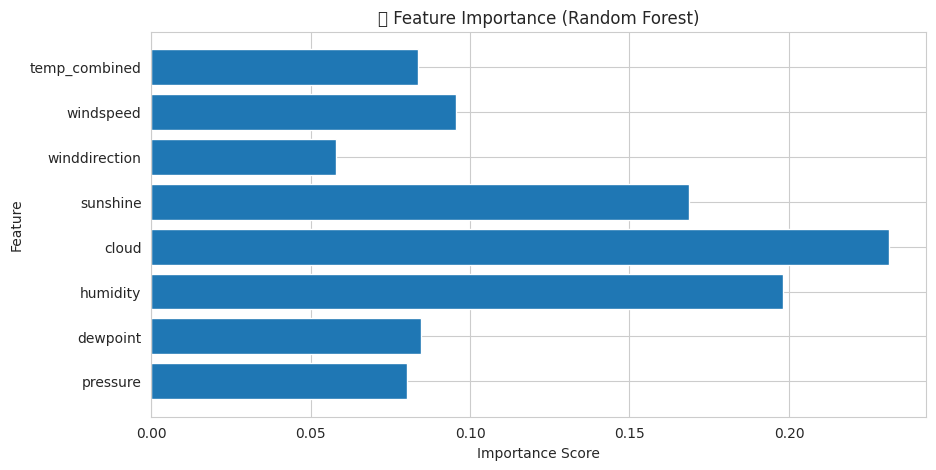

pressure: 0.0801
dewpoint: 0.0846
humidity: 0.1980
cloud: 0.2315
sunshine: 0.1688
winddirection: 0.0580
windspeed: 0.0954
temp_combined: 0.0836


In [11]:
import matplotlib.pyplot as plt

# Fit Random Forest again to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title("📊 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Also print values
for feat, score in zip(features, importances):
    print(f"{feat}: {score:.4f}")


In [17]:
# Step 1: Drop 'winddirection' from dataset
X_reduced = X.drop(columns=['winddirection'])

# Step 2: Split again (with reduced features)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Step 3: Train best model again (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_r, y_train_r)

# Step 4: Evaluate
y_pred_r = rf.predict(X_test_r)

acc_r = accuracy_score(y_test_r, y_pred_r)
f1_r = f1_score(y_test_r, y_pred_r)

print("✅ After Dropping winddirection:")
print(f"   🔸 Accuracy : {acc_r:.4f}")
print(f"   🔹 F1 Score : {f1_r:.4f}")


✅ After Dropping winddirection:
   🔸 Accuracy : 0.8300
   🔹 F1 Score : 0.8381


In [18]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
print("🔁 10-Fold F1 Scores:", scores)
print("📊 Mean F1:", scores.mean())

X['cloud_x_humidity'] = X['cloud'] * X['humidity']
X['sunshine_gap'] = X['dewpoint'] - X['sunshine']


🔁 10-Fold F1 Scores: [0.93617021 0.86363636 0.86956522 0.88888889 0.8        0.875
 0.98039216 0.8627451  0.93333333 0.93617021]
📊 Mean F1: 0.8945901483683766


In [24]:
print("📊 Updated Feature Set (X):")
print(X.head())



📊 Updated Feature Set (X):
   pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed  \
0    1010.6      25.1        81     69       4.7          170.0       12.1   
1    1010.9      24.2        90     86       1.1          190.0       16.0   
2    1018.4      15.8        85     91       0.1           70.0       41.3   
3    1007.2      25.9        87     82       0.5          250.0       21.3   
4    1016.6      17.3        82     84       0.4           50.0       20.3   

   temp_combined  cloud_x_humidity  sunshine_gap  
0       1.511420              5589          20.4  
1       0.575771              7740          23.1  
2      -1.758435              7735          15.7  
3       1.293989              7134          25.4  
4      -1.105016              6888          16.9  


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Use your final, full dataset (X, y)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation using F1 score
f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1')

print("🔁 10-Fold F1 Scores:", f1_scores)
print("📊 Mean F1 Score:", np.mean(f1_scores).round(4))
print("📉 Standard Deviation:", np.std(f1_scores).round(4))


🔁 10-Fold F1 Scores: [0.93617021 0.86363636 0.86956522 0.88888889 0.8        0.875
 0.98039216 0.8627451  0.93333333 0.93617021]
📊 Mean F1 Score: 0.8946
📉 Standard Deviation: 0.0493


In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(n_estimators=100, random_state=42)
f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1')
acc_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("📊 Cross-Validated Accuracy:", np.mean(acc_scores).round(4))
print("📊 Cross-Validated F1 Score:", np.mean(f1_scores).round(4))


📊 Cross-Validated Accuracy: 0.9018
📊 Cross-Validated F1 Score: 0.8946


In [21]:
import pickle

# Final model trained on full dataset
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)

# Save model and feature names
model_data = {
    "model": final_model,
    "features_names": X.columns.tolist()
}

with open("rainfall_prediction_model.pkl", "wb") as file:
    pickle.dump(model_data, file)

print("✅ Model saved successfully as rainfall_prediction_model.pkl")


✅ Model saved successfully as rainfall_prediction_model.pkl
